In [1]:
import os, shutil
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import layers
from keras import models
import tensorflow as tf
from keras.preprocessing import image
tf.config.list_physical_devices('GPU')

2024-03-08 19:28:31.153818: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 19:28:31.153903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 19:28:31.155426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 19:28:31.163758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 19:28:32.154192: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../Generator/dataset/train'
test_dir = '../Generator/dataset/test'

train_square_dir = train_dir + '/square'
train_circle_dir = train_dir + '/circle'
train_none_dir = train_dir + '/none'
train_circle_square_dir = train_dir + '/square_circle'
test_cirlce_square_dir = test_dir + '/square_and_circle'

In [3]:
IMG_SIZE = 500
train_dataset = image_dataset_from_directory(train_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32)
test_dataset = image_dataset_from_directory(test_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

Found 3000 files belonging to 4 classes.


2024-03-08 19:28:37.795592: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 19:28:37.795997: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 19:28:37.796546: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch)
    print('labels batch shape:', labels_batch)
    break

data batch shape: tf.Tensor(
[[[[ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   ...
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]]

  [[ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   ...
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]]

  [[ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   ...
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]]

  ...

  [[ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   ...
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]]

  [[ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   ...
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]]

  [[ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   ...
   [ 37.  36. 155.]
   [ 37.  36. 155.]
   [ 37.  36. 155.]]]


 [[[173.  55. 251.]
   [173.  55. 251.]
   [173.  55. 251.]
   ...
   [173.  55. 251.]
   [173.  55. 251.]
   [173.  55. 251.]]

  [[173.  55. 251.]
   [173.  55. 251.]
   [173.  55. 251.]

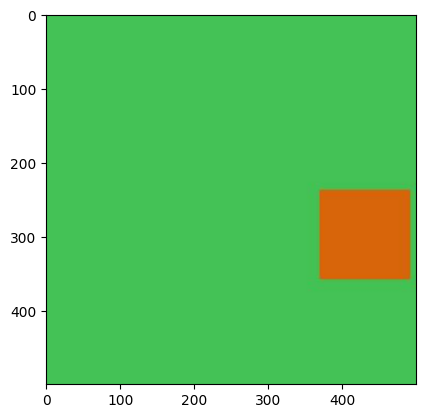

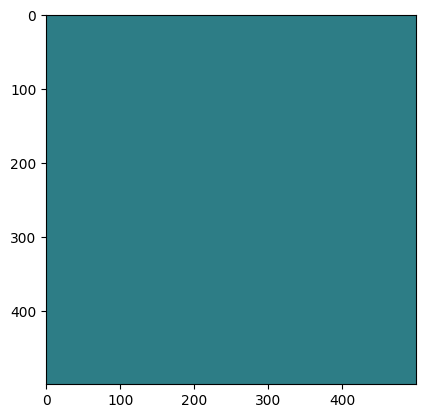

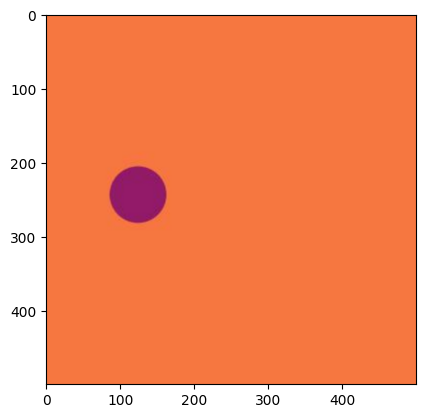

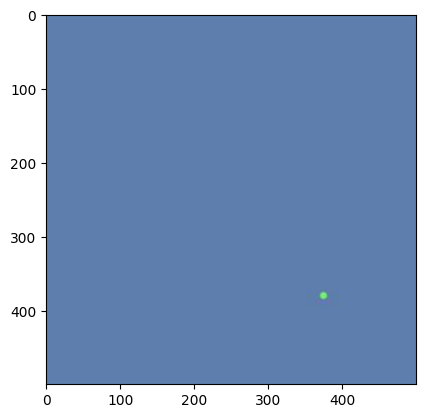

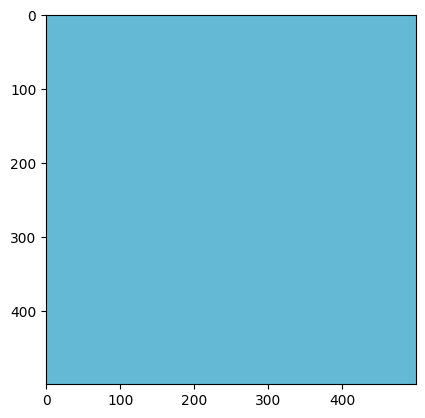

In [5]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [6]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(4, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 64)      0         
 g2D)                                                        

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
history = model.fit(train_dataset, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/fred/.local/lib/python3.11/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [ ]:

print('Test:', model.predict(test_dataset))

In [ ]:
# model.save('models/04_CNN_02_CatsAndDogs_01_cnn_from_scratch.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs_small/validation/dogs/dog.1010.jpg', target_size=(150, 150), interpolation='bilinear')

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())